In [15]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.random_struct_search import Random_Searcher
from classes.optimizers.md_simulator import MD_Simulator
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [16]:
poses = [np.array([-.5,0.0]), np.array([0.5,0.0]), np.array([0.0,0.5])]
atom_list = [Atom(position=pos) for pos in poses]
atom_col = Atom_Collection(atomlist=atom_list)
atom_col.calculator = LennardJones()
min_searcher = Random_Searcher(atom_col=atom_col, step_size=0.1)
relaxed_atoms = min_searcher.line_search(atom_col=atom_col, fmax=0.05)

In [17]:
md_simulator = MD_Simulator()
temp_step = 0.02
temps = np.arange(0, 2.0+temp_step, temp_step)
saved_atom_cols = {}
for temp in temps:
    saved_atom_cols[temp] = md_simulator.run_MD_simulation(atom_col=relaxed_atoms, temp=temp)


In [18]:
mean_Es = {}
for temp in saved_atom_cols:
    atom_cols = saved_atom_cols[temp]
    Es = []
    for atom_col in atom_cols:
        pot_e = atom_col.get_potential_energy()
        kin_e = atom_col.get_kinetic_energy()
        total_energy = pot_e + kin_e
        Es.append(total_energy)
    mean_Es[temp] = np.mean(Es)

In [19]:
Es = [mean_Es[temp] for temp in temps]
t_x = []
cvs = []
for i in range(len(temps) - 1):
    t_x.append(1.0/2.0*(temps[i] + temps[i+1]))
    cv = (Es[i+1] - Es[i])/(temps[i+1]-temps[i])
    cvs.append(cv)

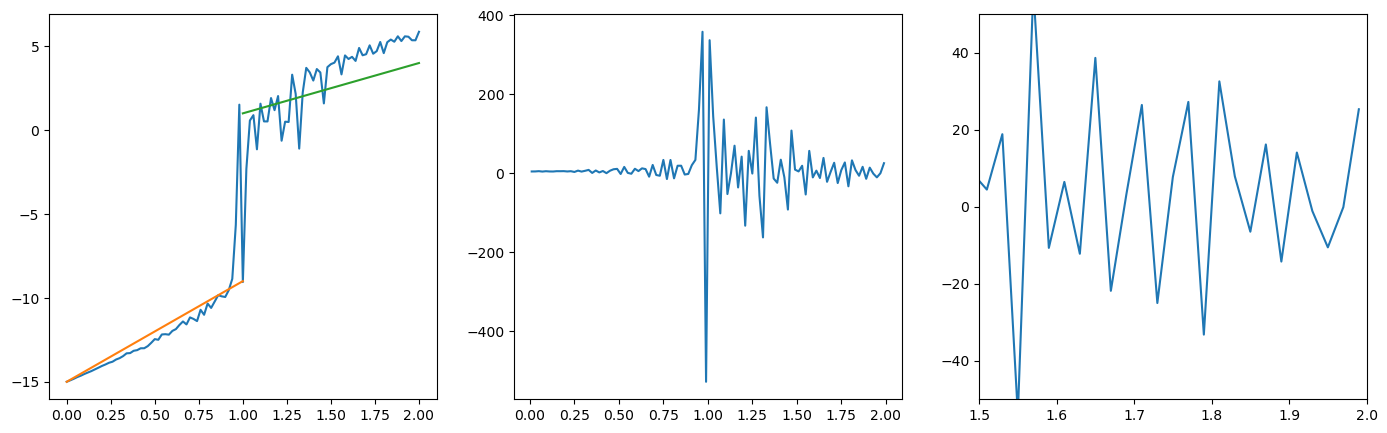

In [29]:
fig, axs = plt.subplots(1,3, figsize=(17,5))
axs[0].plot(temps, Es)
axs[1].plot(t_x, cvs)
axs[2].set_ylim([-50,50])
axs[2].set_xlim([1.5,2.0])
axs[2].plot(t_x, cvs)
def lin_func(xs, a, b):
    return xs*a + b
xs =np.linspace(0,1.0, 100)
axs[0].plot(xs, lin_func(xs, 6, -15))
xs =np.linspace(1.0,2.0, 100)
axs[0].plot(xs, lin_func(xs, 3, -2))